In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/hour.csv")

# Select features and target
X = df.drop(['cnt', 'casual', 'registered', 'dteday', 'instant', 'atemp'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 👉 Step 2: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 👉 Step 3: Predict
y_pred = model.predict(X_test)

# 👉 Step 4: Evaluate
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manual RMSE
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

 RMSE: 42.31
 R² Score: 0.94


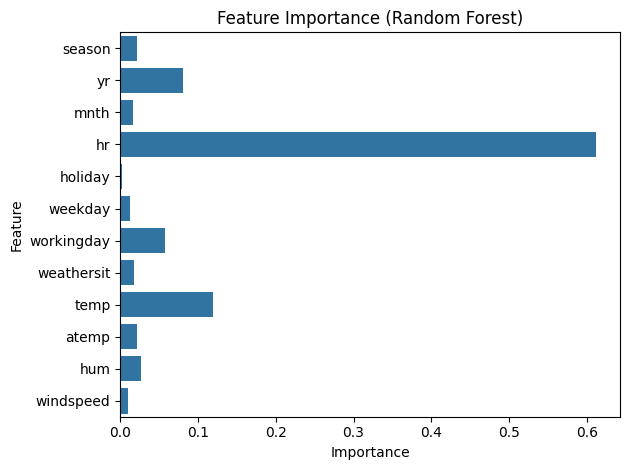

In [6]:
importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
